# Training and Testing 

In [94]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

import pickle5 as pk

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

from sklearn.svm import SVC


1. load the test_class_label.npy and train_class_label.npy  file into your jupyther notebook

In [70]:
train_labels =np.load('/Users/arianauwaibi/Downloads/train_classes_label.npy')

test_labels = np.load('/Users/arianauwaibi/Downloads/test_classes_label.npy')
 
print('showing the size of trianing data set',train_labels.shape)   # Training the machince learning algortirm with this data set and will be later then the test data
print('showing the size of test data set',test_labels.shape)  


print(train_labels[1:5])

showing the size of trianing data set (2832,)
showing the size of test data set (12002,)
[1 1 1 1]


2. load the train_number_sample_perclass.npy and test_number_sample_perclass.npy into your jupyther notebook.

In [71]:
train_number_sample = np.load('/Users/arianauwaibi/Downloads/train_number_sample_perclass.npy')

test_number_sample = np.load('/Users/arianauwaibi/Downloads/test_number_sample_perclass.npy')

print(test_number_sample[1])

size_test = np.load('/Users/arianauwaibi/Downloads/size_test.npy')
size_train = np.load('/Users/arianauwaibi/Downloads/size_train.npy')

print('Number of Pixels for Training',size_train)

print('Number of Pixels for Testing',size_test)


#Shows the number of Pixels inn the First Class 
print(test_number_sample[0])



1034
Number of Pixels for Training 2832
Number of Pixels for Testing 12002
1045


3. compare the number of elements that  train_number_sample_perclass.npy  and  train_class_label.npy, they must have the same number of elements. Do the same with the test data.

In [72]:
print('showing the size of trianing data set',train_number_sample.shape) 
print('showing the size of test data set',test_number_sample.shape)  

print(train_number_sample.shape)
print(test_number_sample.shape)


#For loop for the Amount of Pixels per Class

print("Number of Samples in TRAINING Set")
for index in range(len(train_number_sample)):
    print('class # {0:d},number of sample is {1:d}'.format(index,train_number_sample[index]))

print("Number of Samples for TESTING Set")
for index in range(len(test_number_sample)):
    print('class # {0:d},number of sample is {1:d}'.format(index,test_number_sample[index]))



showing the size of trianing data set (15,)
showing the size of test data set (15,)
(15,)
(15,)
Number of Samples in TRAINING Set
class # 0,number of sample is 198
class # 1,number of sample is 190
class # 2,number of sample is 192
class # 3,number of sample is 188
class # 4,number of sample is 186
class # 5,number of sample is 182
class # 6,number of sample is 196
class # 7,number of sample is 191
class # 8,number of sample is 193
class # 9,number of sample is 191
class # 10,number of sample is 181
class # 11,number of sample is 192
class # 12,number of sample is 184
class # 13,number of sample is 181
class # 14,number of sample is 187
Number of Samples for TESTING Set
class # 0,number of sample is 1045
class # 1,number of sample is 1034
class # 2,number of sample is 502
class # 3,number of sample is 1053
class # 4,number of sample is 1057
class # 5,number of sample is 143
class # 6,number of sample is 1018
class # 7,number of sample is 1042
class # 8,number of sample is 1033
class # 

4. Find a possible solution to use those files and the hyperspectral image to classify the images. 
you can try to do an implementation upon our previous code.

Importing Pickle File that contains pixel data for Training and Testing

In [ ]:
infile = open('/Users/arianauwaibi/Downloads/train_classes_pixels.pkl','rb')
train_class_pixels = pk.load(infile)
infile.close()


infile2 = open('/Users/arianauwaibi/Downloads/test_classes_pixels.pkl','rb')
test_class_pixels = pk.load(infile2)
infile2.close()

print(test_class_pixels)

Printing numbers of Classes and Size of the Train and Test Pixels

In [74]:
#number of pixels are mxm

# b x [nxm]
    #b = the number of bands
    #n x m is the number of pixels per column and row 


In [108]:
print(test_class_pixels[0][0])

h_town = np.load('/Users/arianauwaibi/Downloads/hs_houston.npy')

print('showing the size of image',h_town.shape)

type(h_town)

#Plotting the Spectral Signture if all the Bands (out of 144) in the 1st postion 1st (0) in the 1st Pixels 

who = h_town[:,test_class_pixels[0][0]]

print(who)
who.shape

h_town_cube = np.reshape(h_town.T,(349,1905,144))


21733
showing the size of image (144, 664845)
[  405   531   685   813   900   961  1189  1271  1687  1966  2127  2313
  2405  2473  2374  2534  2720  2949  3154  3239  3277  3379  3354  3285
  3271  3290  3136  3258  3304  3204  3320  3442  3489  3624  4026  4311
  4546  4571  4517  4640  4668  4606  4473  4335  4119  3956  3886  3673
  3347  3376  3422  3485  3326  3181  3100  3024  2947  2938  2860  2745
  2566  2477  2407  2464  2410  2357  2343  2359  1546  2397  2841  3376
  4167  5066  5429  5318  6277  7420  9694 11473 12939 13871 14268 12528
  8792 12526 14723 14940 14877 14482 13857 13743 13560 13661 12766 10334
 10218 10591 11032 11751 12765 13202 13144 12741 13149 13231 12938 13223
 13197 13130 12917 11948  9327  8050  8440  7261  6783  7684  7186  4191
  1949  2225  2249  2295  2518  3058  4013  5815  6816  6896  8140  9379
  9976 10540 10411 10215 10443 10550 10434 10580 10665 10526 10673 10890]


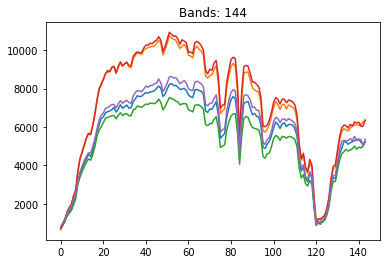

In [76]:


# plotting spectral signature of training and testing pixels
pixels = (1,2,3,4,5)
class_pixels = 0
bands = 144
fig,ax = plt.subplots() #create figure and axes
for pixels_index in range(0,len(pixels)):
    ax.plot(range(0,bands), h_town[:,test_class_pixels[10][pixels[pixels_index]]])
    ax.set_title("Bands: %i" % bands)

# Training The Model Super vector machine or Convultrarty 


Build an Array for Training the Model 

This can be done by making an iteration to extract all the pixel indices from each class

Step 1 Figure out how to sepertrae each class and its label 

15 classes/labels



for each class we need to go through the pixel index in each class

    for ecah index in the class we need to find those values in the hs array

n_class = 15 

i = index for the different classes


for i in range(0,n_class)
    for each index in class
        x_train_appened = h_town[i][each pixel index]


1st the for loop goes through each class then it goes through the index of the class then assigns that index to the (band,pixel format so we are recreating the image)


In [86]:
#Training 

n_class = 15 

x_train =[]

for i in range(n_class):
    for j in range(train_number_sample[i]): 
        x_train.append(h_town[:,train_class_pixels[i][j]])
x_train = np.array(x_train)

# Testing 
x_test= []

for i in range(n_class):
    for j in range(test_number_sample[i]): 
        x_test.append(h_town[:,test_class_pixels[i][j]])
x_test = np.array(x_test)

In [103]:
# SVM classifier: x_train is row x bands
svm = SVC()
svm.fit(x_train, train_labels)
class_result = svm.predict(x_test)
print(svm.predict(x_test))


[ 1  1  1 ... 15 15 15]


In [104]:
print(metrics.classification_report(class_result,y_test))

              precision    recall  f1-score   support

           1       0.81      0.96      0.88       881
           2       0.84      0.95      0.89       913
           3       0.99      0.49      0.66      1008
           4       0.89      0.98      0.94       958
           5       0.97      0.91      0.94      1131
           6       0.83      0.12      0.21      1015
           7       0.63      0.64      0.63       992
           8       0.20      0.86      0.32       241
           9       0.76      0.59      0.66      1339
          10       0.23      0.60      0.34       404
          11       0.61      0.44      0.51      1424
          12       0.25      0.56      0.34       451
          13       0.30      0.20      0.24       399
          14       0.98      0.59      0.74       407
          15       0.93      1.00      0.96       439

    accuracy                           0.65     12002
   macro avg       0.68      0.66      0.62     12002
weighted avg       0.75   

#Print the Matrix 
Accrutay using test labels

Make the black/ blue cube

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[ 849    9  155   13    0   19    0    0    0    0    0    0    0    0
     0]
 [  10  871   35    1    1  116    0    0    0    0    0    0    0    0
     0]
 [   0    0  496    0    0    0    1    0    0    0    3    2    0    0
     0]
 [  22   16   20  942    0   50    3    0    0    0    0    0    0    0
     0]
 [   0    0    0    0 1024    0    0   11    1    6    3    1    0   10
     1]
 [   0    1    1    0    6  119    4    3    1    1    2    5    0    0
     0]
 [   0   13  185    2    0   65  638    0    0    0   26    0    1   88
     0]
 [   0    0    7    0   32  187   22  208   54    3   39  129  310   51
     0]
 [   0    0   24    0   26    0    7    2  788   49  120   10    0    7
     0]
 [   0    0    2    0    0  325    6    0  115  241  329   15    1    0
     0]
 [   0    0   35    0    0  115  187    0   57    5  623    0    0    1
     0]
 [   0    0   42    0   26    0   91    0  286   96  230  253    7    0
     0]


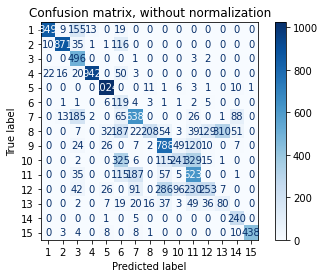

In [107]:
#plot confusion matrix

title_option = [("Confusion matrix, without normalization",None)]

for title, normalize in title_option:
    disp = plot_confusion_matrix(svm,x_test,y_test, cmap=plt.cm.Blues, normalize = normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
plt.show()

Use train_labels and test_labels instead of y_test and y_train 

In [96]:
y_test = test_labels
y_train = train_labels

Do not train the model again now we just need to use the H_TOWN cube data to run in the model 

In [118]:
# evaluating the performance of the model using original image 
print(x_test.shape)
print(h_town.T.shape)

(12002, 144)
(664845, 144)


In [120]:

image_result = svm.predict(h_town.T)

(664845,)
(349, 1905)


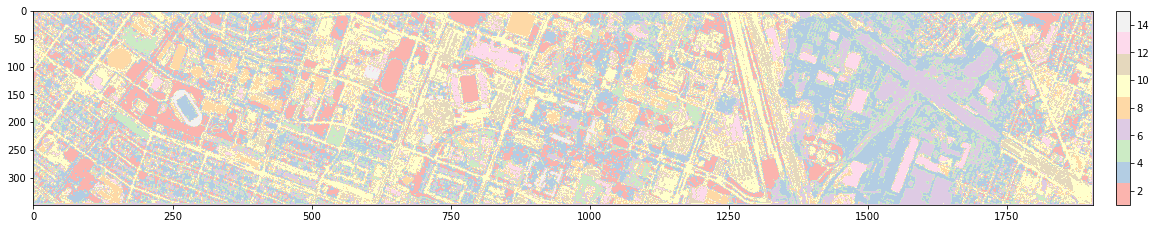

In [127]:
#plot the image it will give the class colors 


from mpl_toolkits.axes_grid1 import make_axes_locatable
print(image_result.shape)
map_classified = np.reshape(image_result,(349,1905))
print(map_classified.shape)
plt.figure(figsize=(20,20))
ax = plt.axes()
img = ax.imshow(map_classified, cmap = 'Pastel1')

#used to get the colorbar 
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(img,cax=cax) #orientation="horizontal"
#plt.show()

plt.imshow(map_classified)